# Jupyter Notebooks

---

## Why They're Awesome:

- One notebook, mixed cell types

- `code` cells execute individually (good for testing small pieces of code)

- **Markdown** cells can describe what's happening in the code 

- Markdown can do *fancy math:*

$\alpha^0x^12 + \alpha^1x^24 + ...$

... what more could you want!

Try Jupyter notebooks ...today!

---

### Imports (Standard)

In [1]:
from PIL import Image
from IPython.display import display

---

### Create a matrix of white pixel values

"Placeholder" pixels for a data-less QR Code.

In [2]:
# white = 1, black = 0
def create_empty_matrix(height,width):
    return [[1 for i in range(width)] for j in range(height)]


---

# Mask Formulas

There are 8 mask formulas, titled:

- `mask_0()`

  ...
  
- `mask_7()`

Each mask formula takes 2 arguments:
- `row` : `int`
- `col` : `int`

`(row,col)` coordinates represent a pixel's location within a QR matrix. 

To apply a mask to a QR code, every pixel's `(row,col)` values are plugged into the mask formula.

---

For example:

`mask_0(row,col)` $-> (row + col)\mod2$

Each mask formula uses *$mod$* operators such that the resulting value is always either `1` or `0`.

Thus, if the result of the mask formula is `1`, the pixel at the given `(row,col)` coordinate is *switched* (i.e., if **black**, it is changed to **white**; if **white**, it is changed to **black**).

If the result of the mask formula is `0`, the pixel is simply left as is.

In [4]:
def mask_0(row,col):
    return (row+col) % 2 == 0

In [5]:
def mask_1(row,col):
    return row % 2 == 0

In [6]:
def mask_2(row,col):
    return col % 3 == 0

In [7]:
def mask_3(row,col):
    return (row + col) % 3 == 0

In [8]:
def mask_4(row,col):
    return ((row // 2) + (col // 3)) % 2 == 0

In [9]:
def mask_5(row,col):
    return ((row * col) % 2) + ((row * col) % 3) == 0

In [10]:
def mask_6(row,col):
    return (((row * col) % 2) + ((row * col) % 3)) % 2 == 0

In [11]:
def mask_7(row,col):
    return (((row + col) % 2) + ((row * col) % 3)) % 2 == 0

In [26]:
mask_patterns = [mask_0, mask_1, mask_2, mask_3,
                 mask_4, mask_5, mask_6, mask_7]

In [27]:
def apply_mask_pattern(pixels, mask_pattern):
    for row in range(len(pixels)):
        for col in range(len(pixels[0])):
            bit_val = pixels[row][col]
            if mask_pattern(row,col):
                bit_val = int(not bit_val)
                pixels[row][col] = bit_val
    return pixels

In [28]:
def show_matrix(pixels):
    height = len(pixels)
    width = len(pixels[0])
    size = (height, width)
     
    img = Image.new("1", size)
    matrix = img.load()
    for y in range(height):
        for x in range(width):
            matrix[x,y] = pixels[y][x]

    # make images larger
    img = img.resize((height*5, width*5))
    display(img)

-------------------------------------------

MASK PATTERN 0:



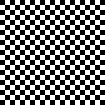

-------------------------------------------

MASK PATTERN 1:



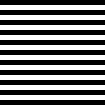

-------------------------------------------

MASK PATTERN 2:



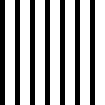

-------------------------------------------

MASK PATTERN 3:



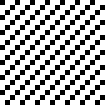

-------------------------------------------

MASK PATTERN 4:



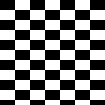

-------------------------------------------

MASK PATTERN 5:



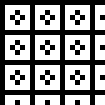

-------------------------------------------

MASK PATTERN 6:



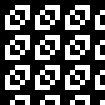

-------------------------------------------

MASK PATTERN 7:



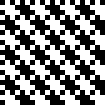

In [29]:
for i, mp in enumerate(mask_patterns):
  empty_matrix = create_empty_matrix(21,21)
  masked_pixels = apply_mask_pattern(empty_matrix, mp)

  print("-"*43)
  print(f"\nMASK PATTERN {i}:\n")
  show_matrix(masked_pixels)